In [176]:
import numpy as np
import cv2                           
from matplotlib import pyplot as plt
import os

## THIS PART OF THE CODE LETS YOU USE THE FILES FROM YOUR GOOGLE DRIVE ACCOUNT
## YOU NEED NOT USE THIS IF YOU ARE NOT USING GOOGLE COLABORATORY


## ASSIGNMENT PART 1
## (a) Open this file on Google Colab
## (b) Make a folder on Google Drive in which you can store images. Upload the "cameraman.tif" provided to you
## (c) The last part of the URL will serve as the "drive_id" in the line below
## If you are unsure, you can read further here : https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

folder_id = 'last-part-of-folder-URL' # Enter the last part of the URL of the Google Drive folder here

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': '\'' + folder_id + "\' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
  
os.chdir(local_download_path)

ModuleNotFoundError: No module named 'google.colab'

(256, 256)


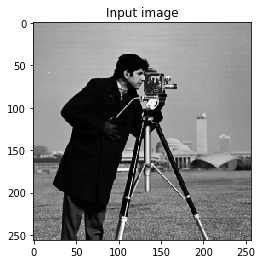

In [27]:
# Read an image
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('cameraman.tif', 0) # 0 flag indicates that the image is read as grayscale
plt.imshow(img, cmap='gray')
plt.title('Input image')
print(img.shape)

# Additional info: As mentioned in class, OpenCV loads images in the BGR format.
# Additional info: RGB is only one of several color spaces. You can find out about other popular color spaces, their applications, and how to use them in OpenCV here: https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/

Text(0.5,1,'Scaled image')

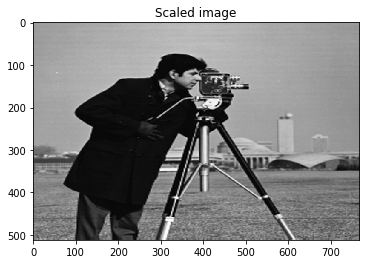

In [28]:
## GEOMETRIC TRANSFORMS

# Image Scaling 

height, width = img.shape
img_resized = cv2.resize(img, (3*width, 2*height), interpolation=cv2.INTER_CUBIC) # Scale the image
plt.imshow(img_resized,'gray')
plt.title('Scaled image')

# ASSIGNMENT PART 2
# (a) Experiment with other scaling factors and output the resized images
# (b) When we want to increase the size of the image, we are essentially adding additional values between every pair of pixels. Intuitively, these new values should be related to existing pixel values. This can be done through interpolation. 
#     Experiment with other interpolation functions and report the results
# (c) When increasing the image size, is the choice of the interpolation function important? If so, why?

# When we increase the size of the image, it is also known as super-resolution. Unsurprisingly (it is 2018), deep learning works very well for this application. An example: https://arxiv.org/abs/1501.00092

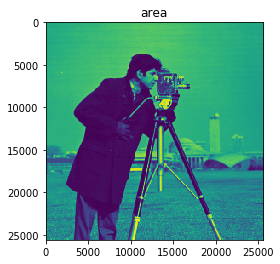

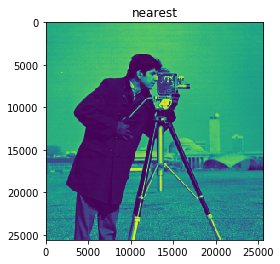

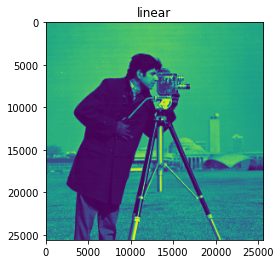

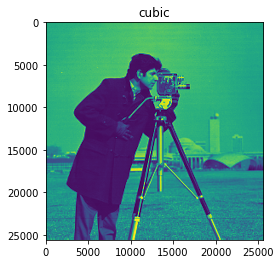

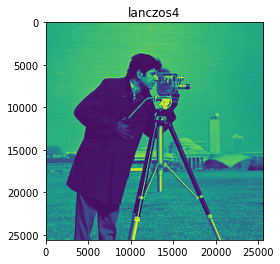

In [29]:
# other interpolation methods: different methods produce different 
# super resolution effects
methods = [('area', cv2.INTER_AREA),
          ("nearest", cv2.INTER_NEAREST),
          ("linear", cv2.INTER_LINEAR),
          ("cubic", cv2.INTER_CUBIC),
          ("lanczos4", cv2.INTER_LANCZOS4)]
for method in methods:
    img_resized = cv2.resize(img, (100*width, 100*height), interpolation=method[1]) # Scale the image
    plt.imshow(img_resized)
    plt.title(method[0])
    plt.show()

In [35]:
# the choice of interpolation method is important because these algorithms
# shows difference of computing time when the image resize is large
import time
methods = [('area', cv2.INTER_AREA),
          ("nearest", cv2.INTER_NEAREST),
          ("linear", cv2.INTER_LINEAR),
          ("cubic", cv2.INTER_CUBIC),
          ("lanczos4", cv2.INTER_LANCZOS4)]
computing_time = []
for method in methods:
    start_time = time.time()
    img_resized = cv2.resize(img, (150*width, 150*height), interpolation=method[1]) # Scale the image
    computing_time.append(time.time()-start_time)
computing_time

[0.2486257553100586,
 0.28594255447387695,
 0.22148370742797852,
 0.33449554443359375,
 1.4511570930480957]

In [36]:
## through experiment we can find that inter_area, inter_nearest, inter_linear have similar running time
## while inter_cubic takes slightly longer while inter_lanczos4 takes the longest due to interpolation over 8 by 8 
## neighbour pixels.

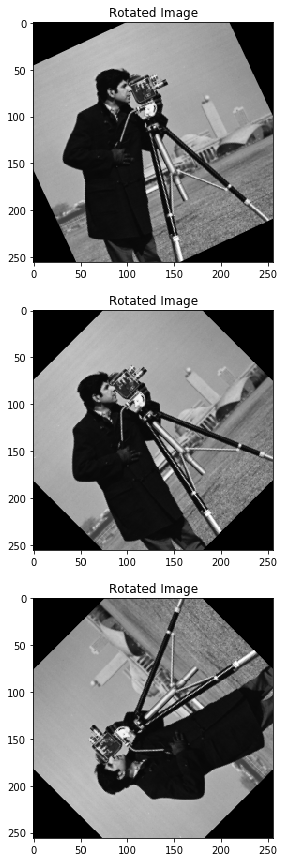

In [65]:
# Image Rotation
figure=plt.figure(figsize=(15,15))
for degree, number in zip([25,45,135],[1,2,3]):
    M = cv2.getRotationMatrix2D((height/2,width/2),degree,1) # Create a rotation matrix
    img_rotated = cv2.warpAffine(img,M,(width,height))   # Rotate the image
    figure.add_subplot(3,1,number)
    plt.imshow(img_rotated,'gray')
    plt.title('Rotated Image')

## ASSIGNMENT PART 3
# (a) Rotate the image through 25, 45 and 135 degrees, observe the outputs and report the results.
# (b) Which interpolation function is being used currently (by default)?
## bilinear interpolation is default method
# (c) Why do we need to do interpolation while rotating an image?
## because after rotating, there will be "new" pixels due to geometrical transformation, hence interpolation is needed
## to fill in the new pixel values.

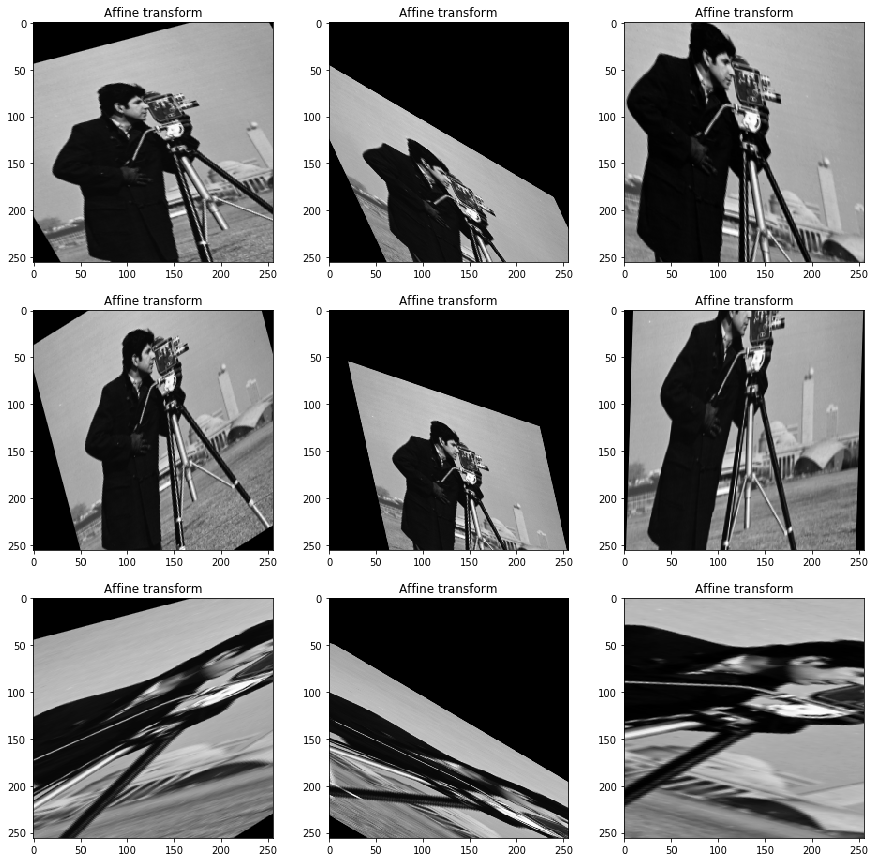

In [79]:
# Affine and perspective transforms
figure=plt.figure(figsize=(15,15))
pts1 = [np.float32([[50,50],[200,50],[50,200]]), np.float32([[0,50],[200,100],[50,200]]), np.float32([[50,50],[100,50],[200,200]])]
pts2 = [np.float32([[10,100],[200,50],[100,250]]), np.float32([[30,100],[200,200],[100,250]]), np.float32([[10,0],[200,50],[50,250]])]
number =1
for ptsa in pts1:
    for ptsb in pts2:
# this can create affine transform matrix
        M = cv2.getAffineTransform(ptsa,ptsb)             # Create the affine transformation matrix
        img_affine = cv2.warpAffine(img,M,(width,height)) # Compute the affine transform
        figure.add_subplot(3,3,number)
        plt.imshow(img_affine, 'gray')
        plt.title('Affine transform')
        number = number+1

## ASSIGNMENT PART 4
# Affine transforms are a more general class of transforms including rotation, translation, scaling, and shearing
# (a) Experiment with other values for 'pts1' and 'pts2' and report the results. Read the documentation and try to understand the working of the cv2.warpAffine function

## affine transform will transform the original image geometrically while keeping the parallel lines still parallel
## the function will find three points in the original image, construct a 2 by 3 matrix and do the matrix multiplication 
## resulting in affine transformation



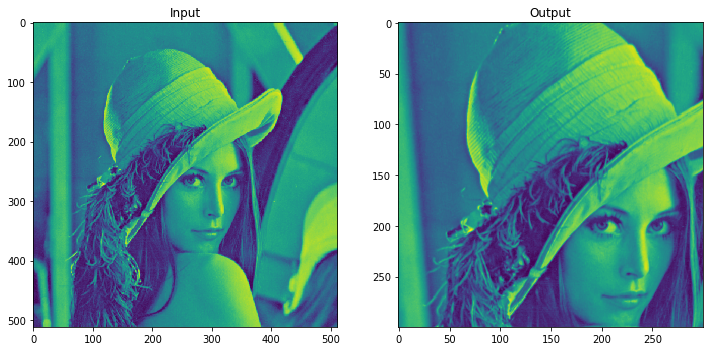

In [90]:
# (b) On an image of your choice, show an example of the perspective transform using built-in functions cv2.getPerspectiveTransform and cv2.warpPerspective
## this is a perspective transform using lena's image showing
img = cv2.imread('lena.bmp', 0) 
rows,cols = img.shape
plt.figure(figsize=(12,12))
pts1 = np.float32([[56,60],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
# get the perspective transform matrix and apply it to the image
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

[array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32), array([[0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625]], dtype=floa

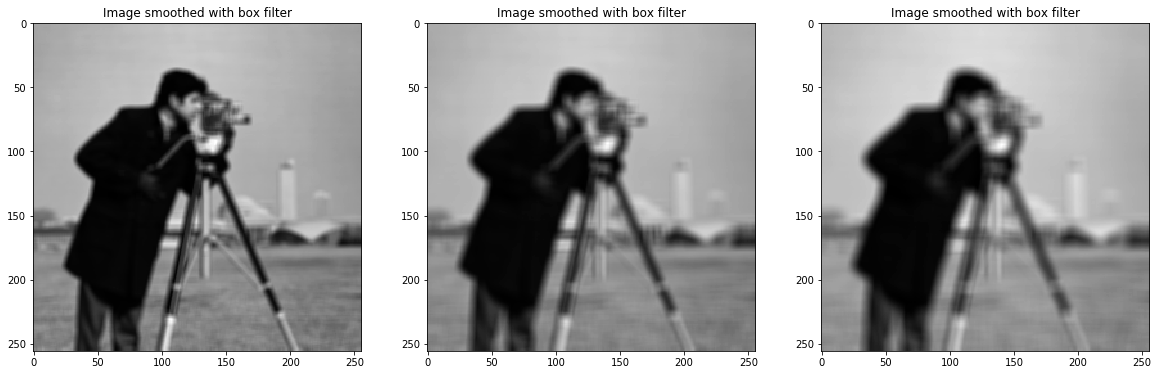

In [98]:
## SMOOTHING

# Averaging with a box filter
img = cv2.imread('cameraman.tif', 0) # 0 flag indicates that the image is read as grayscale
kernel = [np.ones((5,5),np.float32)/25, np.ones((8,8), np.float32)/64, np.ones((10,10), np.float32)/100] # The filter/kernel size is 5x5
print(kernel)
plt.figure(figsize =(20, 10))
number =1
for kernel in kernel:
    img_smooth_average = cv2.filter2D(img, -1, kernel)
    plt.subplot(1,3,number)
    plt.imshow(img_smooth_average, 'gray')
    plt.title('Image smoothed with box filter')
    number = number +1
## ASSIGNMENT PART 5
# (a) What happens when the filter/kernel size is increased? Remember to normalize the co-efficients. Show your experimental results.

## it can be observed that when the filter size is increased, the image becomes more and more blurry

Text(0.5,1,'Bilateral Filtering')

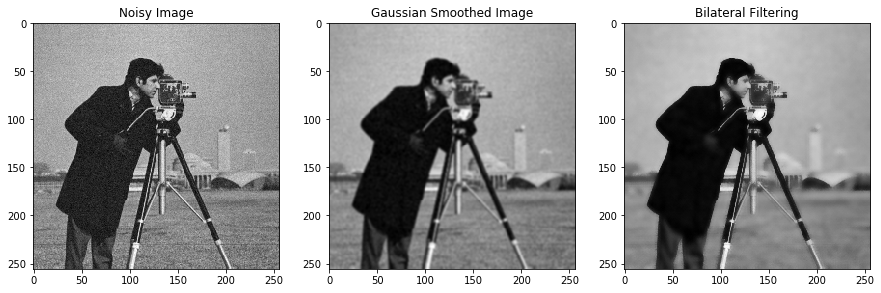

In [102]:
# Gaussian smoothing
sigma = 10.0
img_noisy = img + sigma*np.random.randn(height, width)                       # Create a noisy image by adding Gaussian noise
img_gaussian = cv2.GaussianBlur(img_noisy, (5,5) , 0)                        # Create a smoothed version of the noisy image by convolving with a Gaussian filter
img_bilateral = cv2.bilateralFilter(img_noisy.astype(np.float32), 9, 75, 75) # Smoothing using a bilateral filter
plt.figure(figsize =(15, 10))
plt.subplot(1,3,1), plt.imshow(img_noisy, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1,3,2), plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Smoothed Image')
plt.subplot(1,3,3), plt.imshow(img_bilateral, cmap='gray')
plt.title('Bilateral Filtering')

## ASSIGNMENT PART 6
# As we can see, smoothing with a Gaussian filter can help in image denoising, but it also blurs the edges, which is not desirable. A better approach is to use a bilateral filter. 
# (a) Read about bilateral filtering and briefly explain how a bilateral filter can preserve edges while removing the noise. The first 8-10 pages of this document provide a good reference: https://people.csail.mit.edu/sparis/bf_course/course_notes.pdf

## unlike simple gaussian filter which only consider the spatial averaging using a normal distribution
## bilateral filtering also consider the intensity value difference of the pixel being smoothed and the adjacent pixels
## when there is a sharp edge, implying a great intensity difference between spatially close pixels, the smoothing scaling factor
## reduces expotentially in respect to the intensity difference, hence at the edge, the smoothing will not do much to blur the edge and
## will instead preserve the edge well. The degree of gaussian blur influence and intensity difference influence can be controled by
## parameters called spatial parameter and range parameter

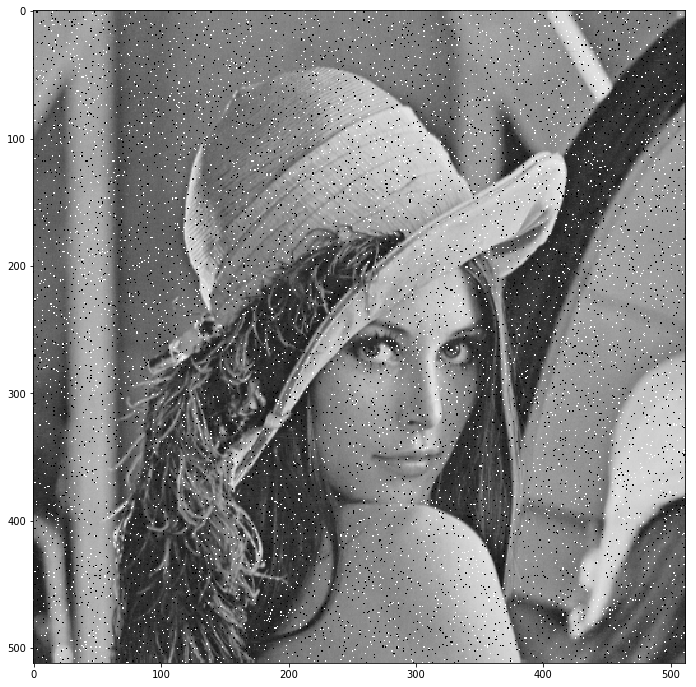

In [136]:
## ASSIGNMENT PART 7
# Salt-and-pepper noise and Median Filtering

# (a) What is salt-and-pepper noise?

## salt and pepper noise is a form of noise which is caused by sharp
## and sudden disturbances in the image signal.

# (b) Add salt-and-pepper noise to your image and display the result
# define salt and pepper noise function to add sp noise
import random
def sp_noise(image, prob):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
plt.figure(figsize =(12, 12))
lena =cv2.imread("lena.bmp", 0)
noise_image = sp_noise(lena, 0.02)
plt.imshow(noise_image, cmap = "gray")

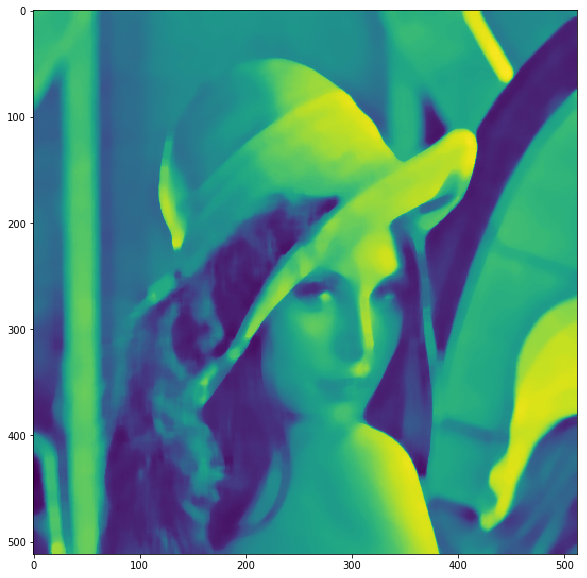

In [173]:
# (c) Apply in-built function cv2.medianBlur on the noisy image, observe and display the output
# We can denoise the image with salt-and-pepper noise using "median filtering"

## using median filter to blur the noisy lena image with salt and pepper noise
## blurring strength controlled by parameter MAX_KERNEL_LENGTH
MAX_KERNEL_LENGTH =15
plt.figure(figsize =(10,10))
for i in range(1, MAX_KERNEL_LENGTH, 4):
    dst =cv2.medianBlur(noise_image, i)
plt.imshow(dst)

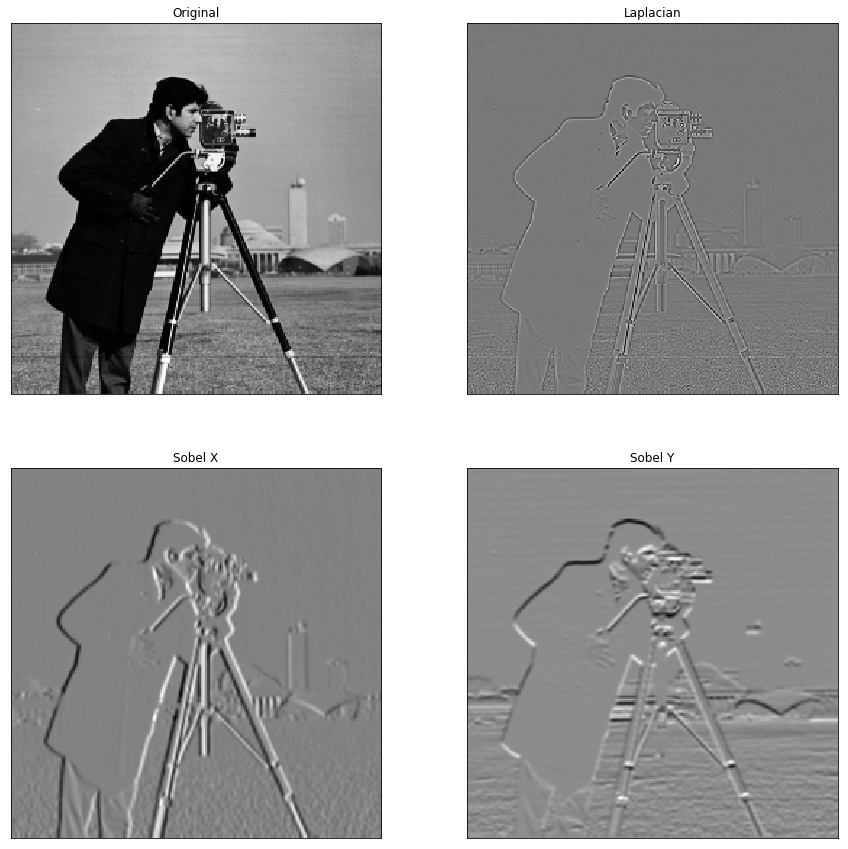

In [175]:
## GRADIENTS

laplacian = cv2.Laplacian(img, cv2.CV_64F)

# cv2.CV_64F is used here to take care of both the positive and 
# negative edges corresponding to positive and negative values,
# will convert both to absolute values
sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0,ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0,1,ksize=5)
plt.figure(figsize =(15,15))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

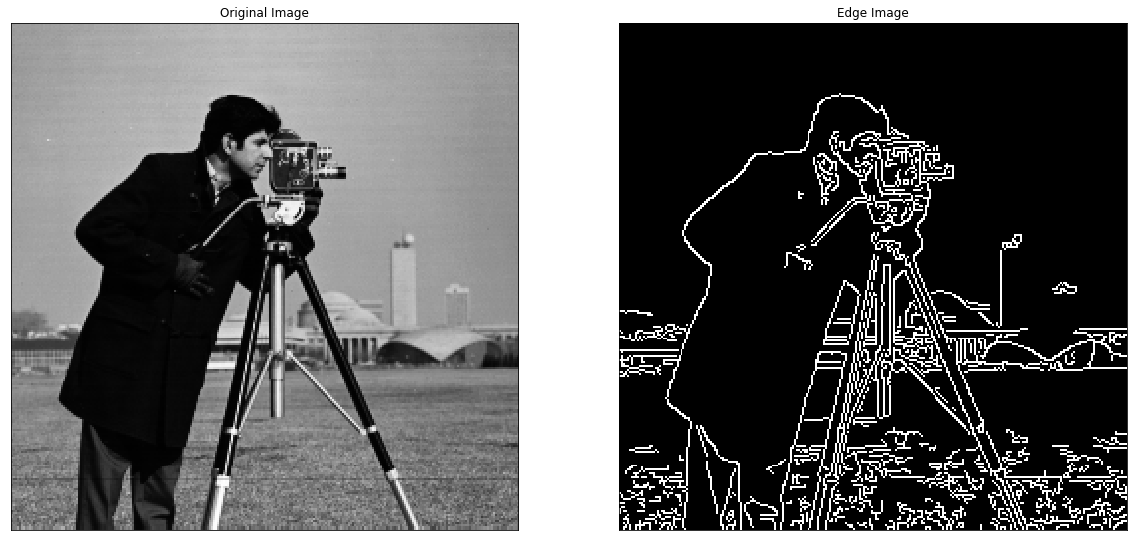

In [179]:
# Canny edge detection
## steps of doing Canny edge detection
## 1. apply gaussian filter to smooth the image to remove the noise 
## 2. find the intensity gradients of the image 
## 3. apply non maximum supression to get rid of spurious response to edge detection
## 4. apply double threshold to determine potential edges
## 5. track edge by hystersis: finalize the detection of edges by suppressing
## all the other edges that are weak and not connected to strong edges


plt.figure(figsize =(20,20))
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
